Build and test synthetic splines

In [201]:
import numpy as np
import pandas as pd
from pandas import DataFrame as DF, Series as Ser
from matplotlib import pyplot as plt
from date_time_string import date_time_string

In [202]:
# Create two polynomial functions f, g: [-1, 2] -> R, such that
#    f(0) = g(0)
#    f'(0) = g'(0)

def f(x):
    return x
    
def g(x):
    return -0.5*(x-1)**2 + 0.5

def fg_piecewise(x):
    return f(x) if x<0 else g(x)

In [203]:
numints = 40   # number of intervals
domain = np.linspace(-2, 2, numints + 1) # closed interval [-2, 2]
domain_neg = domain[:(numints//2 + 1)]   # closed interval [-2, 0]
domain_pos = domain[(numints//2):]       # closed interval [0, 2]

fx_neg =  np.array([f(x) for x in domain_neg])
fx_pos =  np.array([f(x) for x in domain_pos])
gx_neg = np.array([g(x) for x in domain_neg])
gx_pos = np.array([g(x) for x in domain_pos])

fg_pwise = np.array([fg_piecewise(x) for x in domain])

In [204]:
# Create, fit, plot a spline transformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer

splinemodel = make_pipeline(
    SplineTransformer(degree=2, n_knots=3),
    Ridge(alpha=1e-3))
splinemodel.fit(domain.reshape(-1, 1), fg_pwise)


Pipeline(steps=[('splinetransformer', SplineTransformer(degree=2, n_knots=3)),
                ('ridge', Ridge(alpha=0.001))])

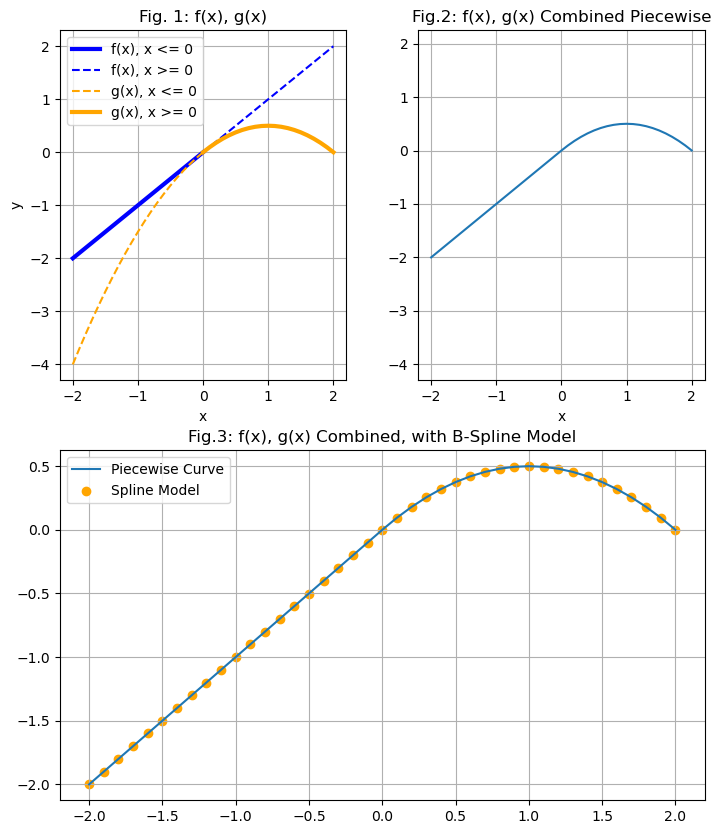

In [214]:
# Combine the plots in a Matplotlib GridSpec
from matplotlib.gridspec import GridSpec
'''
class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, 
bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, 
height_ratios=None)
'''
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2,2, left=0.05, right=0.48, wspace=0.25)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(domain_neg, fx_neg, color='blue', linewidth=3,
        label='f(x), x <= 0')
ax0.plot(domain_pos, fx_pos, '--', color='blue',
        label='f(x), x >= 0')
ax0.plot(domain_neg, gx_neg, '--', color='orange',
        label='g(x), x <= 0')
ax0.plot(domain_pos, gx_pos, color='orange', linewidth=3,
        label='g(x), x >= 0')
ax0.grid()
ax0.legend()
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('Fig. 1: f(x), g(x)')

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(domain, fg_pwise)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylim(-4.3, 2.25)
ax1.set_yticks(np.linspace(-4, 2, 7))
ax1.set_title('Fig.2: f(x), g(x) Combined Piecewise')

ax2 = fig.add_subplot(gs[1, :])
ax2.grid()
ax2.plot(domain, fg_pwise, label="Piecewise Curve")
ax2.scatter(domain, y_plot, color='orange', label="Spline Model")
ax2.legend(loc="upper left")
ax2.set_title("Fig.3: f(x), g(x) Combined, with B-Spline Model")

plt.savefig('spline-test-' + date_time_string() + '.png')
plt.show()